# Sim

## iThor

In [ ]:
# Check conda version
!conda -V

conda 24.9.2


In [ ]:
# Check cuda version
!nvidia-smi

Thu Jan 30 18:00:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8              1W /   90W |       7MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Install matplotlib
%conda install -c conda-forge matplotlib -y

# Install torch
%pip3 install torch torchvision torchaudio

# Install transformers
%pip install 'transformers[torch]'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import requests

import torch

from transformers import CLIPProcessor, CLIPModel


/home/sunzid/anaconda3/envs/ithor/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Initiate scene

In [346]:
from ai2thor.controller import Controller

controller = Controller(

    agentMode="default",
    visibilityDistance=1.5,
    scene="FloorPlan212",

    # step sizes
    gridSize=0.25,
    snapToGrid=True,
    rotateStepDegrees=90,

    # image modalities
    renderDepthImage=True,
    renderInstanceSegmentation=True,

    # camera properties
    width=300,
    height=300,
    fieldOfView=90
)

# controller.ithor_scenes(
#     include_kitchens=True,
#     include_living_rooms=True,
#     include_bedrooms=False,
#     include_bathrooms=False
# )


### Take Action

Movement parameters: MoveAhead, MoveBack, MoveLeft, MoveRight
Rotation parameters: RotateRight, RotateLeft
Camera rotation: LookUp, LookDown
Done: nothing

In [311]:
# Take action with controller.step("MoveBack"), controller.step("MoveLeft"), controller.step("MoveRight"), controller.step("MoveAhead")
event = controller.step(
    action="MoveBack",
    moveMagnitude=0.25)

In [381]:
event = controller.step("MoveAhead")

In [170]:
event = controller.step("MoveLeft")

In [114]:
event = controller.step("MoveRight")

In [385]:
event = controller.step("RotateLeft")

In [369]:
event = controller.step("RotateRight")

### Sense environment

#### Event
```yaml
<ai2thor.server.Event
    .metadata: {...}

    .frame: {...}
    .cv2img: {...}

    .depth_frame: {...}

    .instance_segmentation_frame: {...}
    .instance_masks: {...}
    .instance_detections2D: {...}

    .color_to_object_id: {...}
    .object_id_to_color: {...}
/>
```

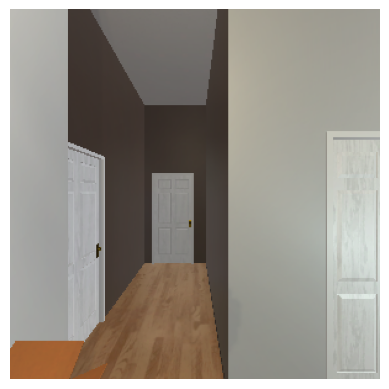

In [400]:
plt.imshow(np.array(controller.last_event.frame))
plt.axis(False);

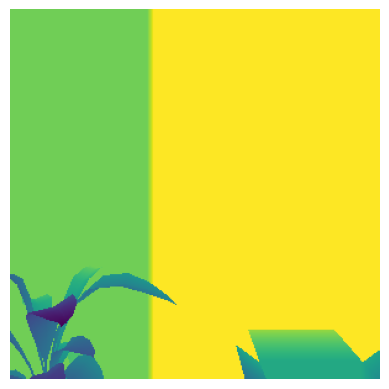

In [382]:
plt.imshow(np.array(controller.last_event.depth_frame))
plt.axis(False);

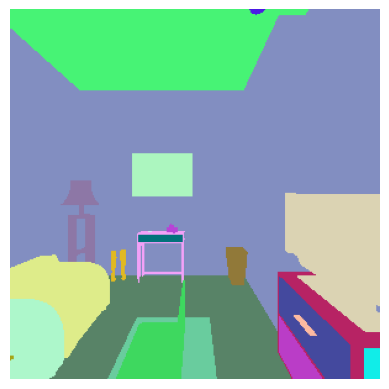

In [314]:
plt.imshow(np.array(controller.last_event.instance_segmentation_frame))
plt.axis(False);

#### Metadata
```yaml
{
    "errorMessage": {...}
    "lastActionSuccess": {...}
    "actionReturn": {...}
    "lastAction": {...}

    "sceneName": {...}
    "sceneBounds": {...}

    "agent": {...}
    "objects": {...}

    "fov": {...}
    "screenWidth": {...}
    "screenHeight": {...}
    {...}
}
```

In [196]:
print(f'error message: {controller.last_event.metadata["errorMessage"]}\n')
print(f'last action success: {controller.last_event.metadata["lastActionSuccess"]}\n')
print(f'action return: {controller.last_event.metadata["actionReturn"]}\n')
print(f'last action: {controller.last_event.metadata["lastAction"]}\n')
print(f'scene name: {controller.last_event.metadata["sceneName"]}\n')
print(f'scene bounds: {controller.last_event.metadata["sceneBounds"]}\n')
print(f'agent: {controller.last_event.metadata["agent"]}\n')
print(f'all objects in the scene: {controller.last_event.metadata["objects"]}\n')
print(f'fov: {controller.last_event.metadata["fov"]}\n')
print(f'screen width: {controller.last_event.metadata["screenWidth"]}\n')
print(f'screen height: {controller.last_event.metadata["screenHeight"]}\n')

error message: 

last action success: True

action return: {'cameraNearPlane': 0.009999999776482582, 'cameraFarPlane': 20.0}

last action: Initialize

scene name: FloorPlan212_physics

scene bounds: {'cornerPoints': [[4.5, 3.799999952316284, 2.6499996185302734], [4.5, 3.799999952316284, -1.9999998807907104], [4.5, -0.20000004768371582, 2.6499996185302734], [4.5, -0.20000004768371582, -1.9999998807907104], [-4.550000190734863, 3.799999952316284, 2.6499996185302734], [-4.550000190734863, 3.799999952316284, -1.9999998807907104], [-4.550000190734863, -0.20000004768371582, 2.6499996185302734], [-4.550000190734863, -0.20000004768371582, -1.9999998807907104]], 'center': {'x': -0.02500009536743164, 'y': 1.7999999523162842, 'z': 0.32499992847442627}, 'size': {'x': 9.050000190734863, 'y': 4.0, 'z': 4.649999618530273}}

agent: {'name': 'agent', 'position': {'x': 0.75, 'y': 0.9009991884231567, 'z': 0.0}, 'rotation': {'x': 0.0, 'y': 270.0, 'z': 0.0}, 'cameraHorizon': -0.0, 'isStanding': True, 'inHi

#### Agent metadata
```yaml
{
    cameraHorizon: {...},
    isStanding: {...},
    position: {...},
    rotation: {...},
    {...}
}
```

In [198]:
# controller.last_event contains the metadata of the last event
print(f'cameraHorizon: {controller.last_event.metadata["agent"]["cameraHorizon"]}\n')

print(f'is standing: {controller.last_event.metadata["agent"]["isStanding"]}\n')

print(f'agent position: {controller.last_event.metadata["agent"]["position"]}\n')

print(f'agnet rotation: {controller.last_event.metadata["agent"]["rotation"]}\n')

cameraHorizon: -0.0

is standing: True

agent position: {'x': 0.75, 'y': 0.9009991884231567, 'z': 0.0}

agnet rotation: {'x': 0.0, 'y': 270.0, 'z': 0.0}



#### Object metadata
```yaml
{
    "objectId": {...},
    "objectType": {...},
    "name": {...},

    "distance": {...},
    "visible": {...},

    "position": {...},
    "rotation": {...},

    "axisAlignedBoundingBox": {...},
    "objectOrientedBoundingBox": {...},

    "mass": {...},
    "salientMaterials": {...},

    "parentReceptacles": {...},
    "receptacle": {...},
    "receptacleObjectIds": {...},

    "ObjectTemperature": {...},
    "canChangeTempToHot": {...},
    "canChangeTempToCold": {...},

    "moveable": {...},
    "isMoving": {...},

    "pickupable": {...},
    "isPickedUp": {...},

    {...Object State Changes...}
}
```

In [202]:
print(f'all objects in the scene: {controller.last_event.metadata["objects"]}\n')

print(f'object id: {controller.last_event.metadata["objects"][0]["objectId"]}\n')
print(f'object type: {controller.last_event.metadata["objects"][0]["objectType"]}\n')
print(f'name: {controller.last_event.metadata["objects"][0]["name"]}\n')

print(f'distance: {controller.last_event.metadata["objects"][0]["distance"]}\n')
print(f'visible: {controller.last_event.metadata["objects"][0]["visible"]}\n')

print(f'position: {controller.last_event.metadata["objects"][0]["position"]}\n')
print(f'rotation: {controller.last_event.metadata["objects"][0]["rotation"]}\n')

print(f'axis aligned bounding box: {controller.last_event.metadata["objects"][0]["axisAlignedBoundingBox"]}\n')
print(f'object oriented bounding box: {controller.last_event.metadata["objects"][0]["objectOrientedBoundingBox"]}\n')

print(f'mass: {controller.last_event.metadata["objects"][0]["mass"]}\n')
print(f'salient materials: {controller.last_event.metadata["objects"][0]["salientMaterials"]}\n')

print(f'parent receptacles: {controller.last_event.metadata["objects"][0]["parentReceptacles"]}\n')
print(f'receptacle: {controller.last_event.metadata["objects"][0]["receptacle"]}\n')
print(f'receptacle object ids: {controller.last_event.metadata["objects"][0]["receptacleObjectIds"]}\n')

if "ObjectTemperature" in controller.last_event.metadata["objects"][0]:
	print(f'object temperature: {controller.last_event.metadata["objects"][0]["ObjectTemperature"]}\n')
else:
	print('object temperature: N/A\n')

if "canChangeTempToHot" in controller.last_event.metadata["objects"][0]:
	print(f'can change temp to hot: {controller.last_event.metadata["objects"][0]["canChangeTempToHot"]}\n')
else:
	print('can change temp to hot: N/A\n')

if "canChangeTempToCold" in controller.last_event.metadata["objects"][0]:
	print(f'can change temp to cold: {controller.last_event.metadata["objects"][0]["canChangeTempToCold"]}\n')
else:
	print('can change temp to cold: N/A\n')

print(f'moveable: {controller.last_event.metadata["objects"][0]["moveable"]}\n')
print(f'is moving: {controller.last_event.metadata["objects"][0]["isMoving"]}\n')

print(f'pickupable: {controller.last_event.metadata["objects"][0]["pickupable"]}\n')
print(f'is picked up: {controller.last_event.metadata["objects"][0]["isPickedUp"]}\n')

all objects in the scene: [{'name': 'ArmChair_60160c64', 'position': {'x': -0.27000540494918823, 'y': 0.0002917051315307617, 'z': 1.8700162172317505}, 'rotation': {'x': -1.6307616306221462e-06, 'y': 181.37197875976562, 'z': -6.423287686629919e-06}, 'visible': False, 'isInteractable': False, 'receptacle': True, 'toggleable': False, 'isToggled': False, 'breakable': False, 'isBroken': False, 'canFillWithLiquid': False, 'isFilledWithLiquid': False, 'fillLiquid': None, 'dirtyable': False, 'isDirty': False, 'canBeUsedUp': False, 'isUsedUp': False, 'cookable': False, 'isCooked': False, 'temperature': 'RoomTemp', 'isHeatSource': False, 'isColdSource': False, 'sliceable': False, 'isSliced': False, 'openable': False, 'isOpen': False, 'openness': 0.0, 'pickupable': False, 'isPickedUp': False, 'moveable': True, 'mass': 28.299999237060547, 'salientMaterials': ['Fabric'], 'receptacleObjectIds': [], 'distance': 2.312713861465454, 'objectType': 'ArmChair', 'objectId': 'ArmChair|-00.27|+00.00|+01.87', 

In [205]:
# Get object in frame

query = controller.step(
    action="GetObjectInFrame",
    x=0.64,
    y=0.40,
    checkVisible=False
)

object_id = query.metadata["actionReturn"]
object_id

# Process Sensory Inputs

## Vision branch

### Literature

### Object detection

#### YOLO

In [ ]:
%pip install ultralytics

In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("models/YOLO/yolov8n.pt")
class_names = model.names  # Dictionary mapping class IDs to names


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/sunzid/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:01<00:00, 5.72MB/s]


In [315]:

# Perform object detection on an image
results = model(np.array(controller.last_event.frame))
results[0].show()



0: 640x640 1 chair, 1 couch, 1 bed, 1 tv, 6.1ms
Speed: 17.1ms preprocess, 6.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Opening in existing browser session.


In [316]:

# Extract detections
for result in results:
    for box in result.boxes:
        x, y, w, h = box.xywh[0]  # Bounding box
        confidence = box.conf[0]  # Detection probability
        class_label = class_names[int(box.cls[0].item())]  # Class label

        print(f"Class: {class_label}, Confidence: {confidence:.2f}, BBox: ({x}, {y}, {w}, {h})")

Class: couch, Confidence: 0.58, BBox: (40.86000442504883, 248.81517028808594, 81.4276351928711, 100.83663940429688)
Class: tv, Confidence: 0.44, BBox: (261.26806640625, 195.79086303710938, 77.25843811035156, 93.64247131347656)
Class: chair, Confidence: 0.41, BBox: (40.79352951049805, 248.98992919921875, 81.4154281616211, 101.18180847167969)
Class: bed, Confidence: 0.28, BBox: (119.39700317382812, 256.6526184082031, 207.144775390625, 86.092529296875)


#### CLIP

In [218]:
clipModel = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clipProcessor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [219]:
labels=["kitchen",
        "living room",
        "bed room",
        "bathroom"]

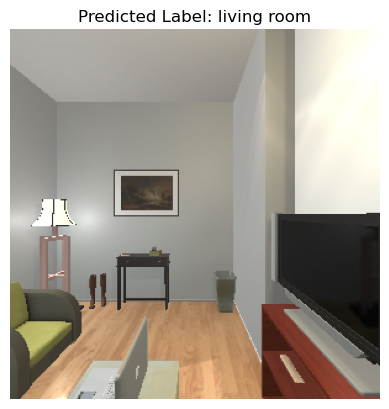

In [220]:
inputs = clipProcessor(labels, images=np.array(controller.last_event.frame), return_tensors="pt", padding=True)

outputs = clipModel(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

hiProbLabel = labels[torch.argmax(probs).item()]

plt.imshow(np.array(controller.last_event.frame));
plt.axis(False);
plt.title("Predicted Label: " + hiProbLabel);

### Segmentation

#### Clipseg

In [329]:
from transformers import AutoProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests

processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

/home/sunzid/anaconda3/envs/ithor/lib/python3.13/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


torch.Size([1, 352, 352])


In [330]:

image = np.array(controller.last_event.frame)
texts = ["a chair"]
inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")

outputs = model(**inputs)

logits = outputs.logits
print(logits.shape)

torch.Size([1, 352, 352])


In [331]:
import cv2

torch.Size([1, 352, 352])


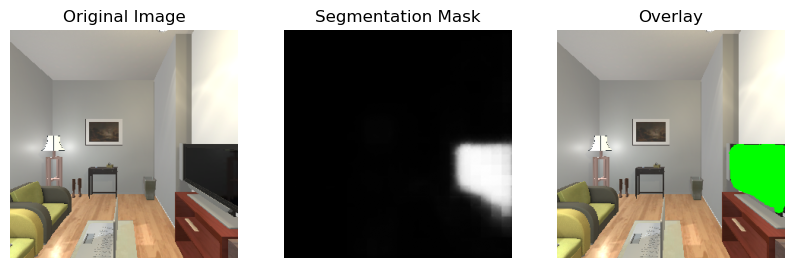

In [342]:

image = np.array(controller.last_event.frame)
texts = ["a TV"]
inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")

outputs = model(**inputs)

logits = outputs.logits
print(logits.shape)

# Convert mask to numpy array (DETACH before .numpy())
mask = outputs.logits.squeeze().sigmoid().detach().cpu().numpy()  # Convert to probability map

# Normalize the mask for visualization
mask = (mask * 255).astype(np.uint8)

# Resize mask to match original image size
mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))  # Ensure correct dimensions

# Apply threshold to create a binary mask
_, binary_mask = cv2.threshold(mask_resized, 128, 255, cv2.THRESH_BINARY)

# Overlay mask on the original image
overlay = image.copy()
overlay[binary_mask > 128] = [0, 255, 0]  # Highlight the mask in green

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis(False);
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(mask_resized, cmap="gray")
plt.axis(False);
plt.title("Segmentation Mask")

plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.axis(False);
plt.title("Overlay")

plt.axis(False);
plt.show()

In [343]:
# Get the depth map as a NumPy array
depth_map = np.array(controller.last_event.depth_frame)  # Shape: (H, W)

# Ensure the depth map has the same size as the image
depth_map_resized = cv2.resize(depth_map, (image.shape[1], image.shape[0]))

# Extract depth values where the mask is active (binary_mask > 128)
masked_depth_values = depth_map_resized[binary_mask > 128]

# Compute the average depth within the masked region
if masked_depth_values.size > 0:
    average_depth = np.mean(masked_depth_values)
else:
    average_depth = None  # No valid depth values in the mask

# Print result
print(f"Average Depth in Masked Region: {average_depth}")


Average Depth in Masked Region: 1.2981693744659424


In [345]:
# Get the coordinates of all pixels inside the mask
mask_indices = np.argwhere(binary_mask > 128)  # Get (y, x) positions

image_height, image_width = image.shape[:2]
print(f"Full Image Size: Width = {image_width}, Height = {image_height}")

# Compute the centroid (midpoint)
if mask_indices.size > 0:
    centroid_y, centroid_x = np.mean(mask_indices, axis=0).astype(int)
    print(f"Mask Midpoint (Centroid): ({centroid_x}, {centroid_y})")
else:
    centroid_x, centroid_y = None, None
    print("No valid mask region detected.")


Full Image Size: Width = 300, Height = 300
Mask Midpoint (Centroid): (266, 187)


#### Sam2 mask generation

In [ ]:
%pip install sam2

In [323]:
import torch
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

mask_generator = SAM2AutomaticMaskGenerator.from_pretrained("facebook/sam2-hiera-small", device="cuda")    


In [327]:
np.random.seed(3)

def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask 
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1) 

    ax.imshow(img)

In [325]:
masks = mask_generator.generate(np.array(controller.last_event.frame))

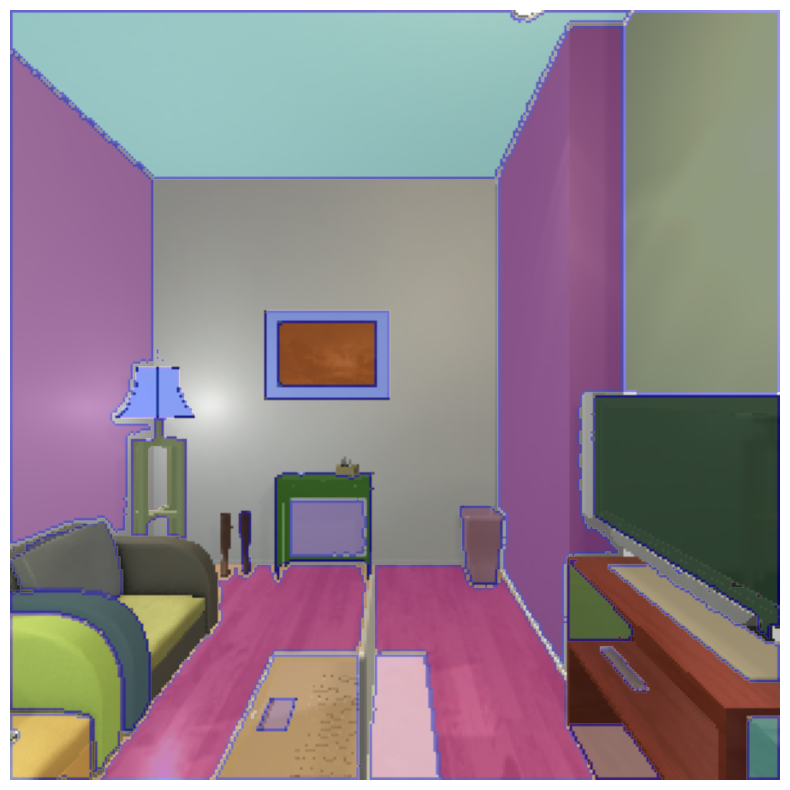

In [328]:
plt.figure(figsize=(10,10))
plt.imshow(np.array(controller.last_event.frame))
show_anns(masks)
plt.axis(False);
plt.show()

### Visual object embedding

#### CLIP Embeding

In [ ]:
from transformers import CLIPModel, CLIPProcessor

clipModel = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clipProcessor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [388]:
input_image = np.array(controller.last_event.frame)

# Preprocess the image
inputs = clipProcessor(images=input_image, return_tensors="pt")

with torch.no_grad():
    image_embeddings = clipModel.get_image_features(**inputs)

In [390]:
image_embeddings.shape

torch.Size([1, 512])

In [406]:
query = "A corridor with doors"  # Input Query

query_tokens = clipProcessor.tokenizer([query], return_tensors="pt")  # Tokenize Before Embeddings

with torch.no_grad():
  query_embeddings = clipModel.get_text_features(**query_tokens)
  
  
def calculate_similarity(query_embeddings, input_embeddings):
  similariries = query_embeddings @ input_embeddings.T
  return similariries
  
sim = calculate_similarity(query_embeddings, image_embeddings)

sim

tensor([[28.4528]])

# Exploration and Knowledge
## Literature
### POMDP

| Variable          | Description          |
|-------------------|----------------------|
| $\mathcal{S}$     | State space          |
| $\mathcal{A}$     | Action space         |
| $\mathcal{O}$     | Observation space    |
| $T(s'|s,a)$       | Transition function  |
| $R(s,a)$          | Reward function      |
| $O(o|s')$         | Observation function |
| $\gamma \in [0,1]$| Discount factor      |

